<a href="https://colab.research.google.com/github/JeonJunWooo/YOLO-v5/blob/main/YOLOv5_%EC%A7%81%EC%A0%91%EA%B0%80%EC%A4%91%EC%B9%98%EB%A7%8C%EB%93%A4%EA%B8%B0_ImageDetection_%EC%9D%BC%EB%8B%A8%EB%8F%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UltraLytics YOLO v5 Custom Data Image Detection 직접하기

## UltraLytics YOLO v5 설치

![install](https://github.com/DrKAI/CV/raw/main/UltraLytics_manual/yolov5_install.png)

[Install Page](https://github.com/ultralytics/yolov5)

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12652, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 12652 (delta 6), reused 10 (delta 3), pack-reused 12633
Receiving objects: 100% (12652/12652), 12.85 MiB | 33.23 MiB/s, done.
Resolving deltas: 100% (8720/8720), done.


In [ ]:
!cd yolov5; pip install -r requirements.txt

## Image Detection

1. **본인이 사전 작업한 CustomData yaml 다운로드**

2. pretrained 된 weights 다운로드
    - weights가 없으면 자동 다운로드

3. train.py 실행

4. **테스트용 이미지 다운로드**

4. detect.py 실행

### 1) **본인의 CustomData yaml 다운로드** (50장으로 적은데이터)

- CustomData yaml 사전 작업 필요

In [3]:
!wget -O /content/yolov5/data/act.yaml https://github.com/JeonJunWooo/YOLO-v5/raw/main/act.yaml

--2022-09-23 06:37:41--  https://github.com/JeonJunWooo/YOLO-v5/raw/main/act.yaml
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeonJunWooo/YOLO-v5/main/act.yaml [following]
--2022-09-23 06:37:41--  https://raw.githubusercontent.com/JeonJunWooo/YOLO-v5/main/act.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 302 [text/plain]
Saving to: ‘/content/yolov5/data/act.yaml’

/content/yolov5/dat 100%[===================>]     302  --.-KB/s    in 0s      

2022-09-23 06:37:41 (18.2 MB/s) - ‘/content/yolov5/data/act.yaml’ saved [302/302]



### 2) Pretrained weights 다운로드

![Pretrained weights](https://github.com/DrKAI/CV/raw/main/UltraLytics_manual/yolov5_pretrained.png)

[Pretrained weights Page](https://github.com/ultralytics/yolov5)

In [4]:
!mkdir /content/yolov5/pretrained

In [ ]:
!wget -O /content/yolov5/pretrained/yolov5x.pt https://github.com/ultralytics/yolov5/releases/download/v6.2/yolov5x.pt

### 3) train.py 실행

- 명령어 도움말 : python train.py -h

### 4) 사전작업한 ymal파일로 트레이닝 시키기(내가 만든 가중치)

- 명령어 도움말 : python detect.py -h

In [9]:
!cd yolov5; python train.py \
    --data '/content/yolov5/data/act.yaml' \
    --cfg '/content/yolov5/models/yolov5x.yaml' \
    --weights '/content/yolov5/pretrained/yolov5x.pt' \
    --epochs 1000 \
    --patience 7 \
    --img 640 \
    --project 'trained' \
    --name 'train_street' \
    --exist-ok
    # --device cpu

train: weights=/content/yolov5/pretrained/yolov5x.pt, cfg=/content/yolov5/models/yolov5x.yaml, data=/content/yolov5/data/act.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1000, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=trained, name=train_street, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=7, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-157-g30fa9b6 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, o

### 5) **사전작업한 이미지 다운로드**

In [6]:
!mkdir /content/datasets; mkdir /content/datasets/act

In [ ]:
!wget -O /content/images.zip https://github.com/JeonJunWooo/YOLO-v5/raw/main/images.zip

!wget -O /content/labels.zip https://github.com/JeonJunWooo/YOLO-v5/raw/main/labels.zip


In [ ]:
!unzip /content/images.zip -d /content/datasets/act


!unzip /content/labels.zip -d /content/datasets/act

## Detect Image 살펴보기

Detect 용 이미지 다운로드

In [ ]:
!wget -O /content/yolov5/data/images/1.jpg https://github.com/JeonJunWooo/YOLO-v5/raw/main/test/11.jpg
!wget -O /content/yolov5/data/images/2.jpg https://github.com/JeonJunWooo/YOLO-v5/raw/main/test/37.jpg
!wget -O /content/yolov5/data/images/3.jpg https://github.com/JeonJunWooo/YOLO-v5/raw/main/test/mm.jpg
!wget -O /content/yolov5/data/images/4.jpg https://github.com/JeonJunWooo/YOLO-v5/raw/main/test/v.jpg
!wget -O /content/yolov5/data/images/5.jpg https://github.com/JeonJunWooo/YOLO-v5/raw/main/test/26.jpg
!wget -O /content/yolov5/data/images/6.jpg https://github.com/JeonJunWooo/YOLO-v5/raw/main/test/37.jpg
!wget -O /content/yolov5/data/images/7.jpg https://github.com/JeonJunWooo/YOLO-v5/raw/main/test/41.jpg
!wget -O /content/yolov5/data/images/8.jpg https://github.com/JeonJunWooo/YOLO-v5/raw/main/test/1212.jpg
!wget -O /content/yolov5/data/images/9.jpg https://github.com/JeonJunWooo/YOLO-v5/raw/main/test/123.jpg
!wget -O /content/yolov5/data/images/10.jpg https://github.com/JeonJunWooo/YOLO-v5/raw/main/test/124.jpg
!wget -O /content/yolov5/data/images/11.jpg https://github.com/JeonJunWooo/YOLO-v5/raw/main/test/125.jpg
!wget -O /content/yolov5/data/images/12.jpg https://github.com/JeonJunWooo/YOLO-v5/raw/main/test/126.jpg
!wget -O /content/yolov5/data/images/13.jpg https://github.com/JeonJunWooo/YOLO-v5/raw/main/test/128.jpg

In [11]:
from IPython.display import Image
from google.colab import files

## 다운받은 이미지 내 가중치로 맞춰보기

In [ ]:
!cd yolov5; python detect.py \
    --weights '/content/yolov5/trained/train_street/weights/best.pt' \
    --source '/content/yolov5/data/images/' \
    --project '/content/yolov5/detected' \
    --name 'images' \
    --img 640 \
    --conf-thres 0.25 \
    --iou-thres 0.1 \
    --line-thickness 2 \
    --exist-ok 
    # --device CPU

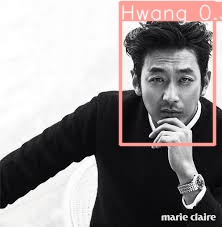

In [26]:
Image(filename='/content/yolov5/detected/images/1.jpg', width=640)

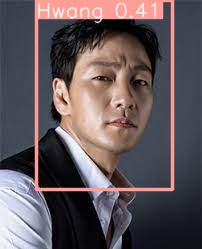

In [27]:
Image(filename='/content/yolov5/detected/images/4.jpg', width=640)

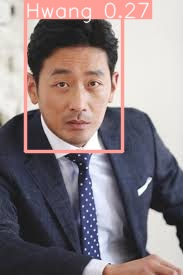

In [28]:
Image(filename='/content/yolov5/detected/images/2.jpg', width=640)

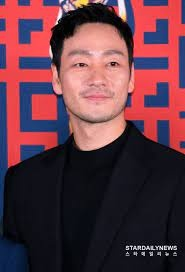

In [29]:
Image(filename='/content/yolov5/detected/images/3.jpg', width=640)

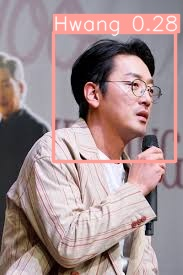

In [30]:
Image(filename='/content/yolov5/detected/images/5.jpg', width=640)

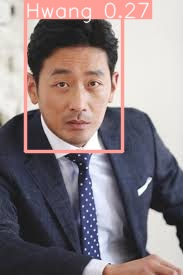

In [31]:
Image(filename='/content/yolov5/detected/images/6.jpg', width=640)

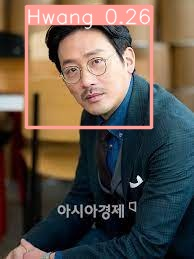

In [32]:
Image(filename='/content/yolov5/detected/images/7.jpg', width=640)

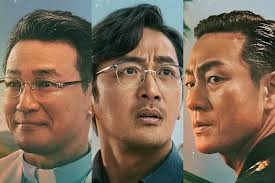

In [33]:
Image(filename='/content/yolov5/detected/images/8.jpg', width=640)

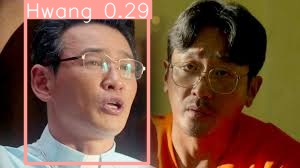

In [38]:
Image(filename='/content/yolov5/detected/images/13.jpg', width=640)

In [ ]:
## colab은 멀티 다운로드를 지원하지 않는다
## 폴더를 압축하여 파일 하나로 만들고 다운로드 한다

!zip -r /content/detected_images.zip /content/yolov5/detected/images

In [ ]:
files.download(filename='/content/detected_images.zip')